### Read Korean Ballad Lyrics Dataset

In [1]:
import pandas as pd
import numpy as np

In [25]:
import os
# designate root path for the data
DATA_ROOT_PATH = "./data"

# designate path for each dataset files
LYRIC_PATH = os.path.join(DATA_ROOT_PATH, "lyrics_kor.txt")
BILLBOARD_PATH = os.path.join(DATA_ROOT_PATH, "rawdata_김지훈_201500844.tsv")
GEULSTAGRAM_PATH = os.path.join(DATA_ROOT_PATH, "geulstagram.csv")

In [11]:
# read txt file from line by line
def read_txt(path):
    with open(path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    return lines

sample_lyrics = read_txt(LYRIC_PATH)[:10]
sample_lyrics

['내 곁에서 떠나가지 말아요 \n',
 '그대없는 밤은 너무 쓸쓸해 \n',
 '그대가 더 잘 알고 있잖아요 \n',
 '제발 아무말도 하지 말아요\n',
 '나약한 내가 뭘 할수 있을까 생각을 해봐\n',
 '그대가 내겐 전부였었는데 음~오 \n',
 '제발 내 곁에서 떠나가지 말아요\n',
 '그대없는 밤은 너무 싫어\n',
 '우~우~우~ 돌이킬수 없는 그대 마음 \n',
 '우~우~우~ 이제와서 다시 어쩌려나\n']

In [9]:
# make preprocessing function
def preprocess(list_lines:list) -> list:
    # remove \n
    list_lines = [line.strip() for line in list_lines]
    
    # remove empty lines
    list_lines = [line for line in list_lines if line]
    
    # remove duplicate elements from the list_lines
    list_lines = list(set(list_lines))
    return list_lines

preprocess(sample_lyrics)

['우~우~우~ 돌이킬수 없는 그대 마음',
 '제발 내 곁에서 떠나가지 말아요',
 '그대없는 밤은 너무 쓸쓸해',
 '나약한 내가 뭘 할수 있을까 생각을 해봐',
 '제발 아무말도 하지 말아요',
 '그대가 내겐 전부였었는데 음~오',
 '그대없는 밤은 너무 싫어',
 '내 곁에서 떠나가지 말아요',
 '우~우~우~ 이제와서 다시 어쩌려나',
 '그대가 더 잘 알고 있잖아요']

### Read Korean Billboard Song dataset

In [18]:
# read and load from tsv
df_billboard = pd.read_csv(BILLBOARD_PATH, sep='\t')
print(df_billboard.shape)
df_billboard.head(3)

(2276, 5)


,ID,Year,Title,Singer,Lyric
0,1,1964,동백아가씨,이미자,헤일 수 없이 수많은 밤을 내 가슴 도려내는 아픔에 겨워 얼마나 울었던가 동백아가씨...
1,2,1964,마도로스 부기,백야성,항구의 일~~번지 부기우기 일~번지 그라스를 채워~다오 부기우기 아~~가씨 고동이 ...
2,3,1964,이국땅,남일해,하룻밤 뱃길이면 가고 오건만 못 가는 이국땅에 서러움이 많 아현해탄 파도 위에 비친...


In [23]:
# filter by year where year is greater than 2015
df_billboard_recent = df_billboard[df_billboard['Year'] > 2010]
# remove row where Lyric contains "청소년 보호법에 따라 성인 인증이 필요한 콘텐츠 입니다."
df_billboard_recent = df_billboard_recent[df_billboard_recent['Lyric'].str.contains("청소년 보호법에 따라 성인 인증이 필요한 콘텐츠 입니다.") == False]
# display head of the dataframe
df_billboard_recent.head(3)

,ID,Year,Title,Singer,Lyric
1832,1833,2011,여우야,투개월,창 밖엔 서글픈 비만 내려오네 내 마음 너무 안타까워 이제 다시 볼 수가 없기에 처...
1833,1834,2011,Lonely,2NE1,지금 내가 하는 얘기 널 아프게 할지 몰라 아마 날 죽도록 미워하게 될 꺼야 내가 ...
1834,1835,2011,나만 몰랐던 이야기,아이유,정말 넌 다 잊었더라 반갑게 날 보는 너의 얼굴 보니 그제야 어렴풋이 아파오더라 새...


### Read Geulstagram dataset

In [26]:
df_geulstagram = pd.read_csv(GEULSTAGRAM_PATH)
print(df_geulstagram.shape)
df_geulstagram.head(3)

(25179, 8)


,Unnamed: 0,USER_ID,Image_Content_txt,Image_Content_txt_result,Content_txt,Hashtags,Hashtags_result,Spell_Checked_Content
0,0,1day1poem,XXL 칫솔은 새 것인데 솔질이 새 것 아니니 잇몸에 피가 난다. 저 뺏뻣한 것을 ...,칫솔은 새 것인데 솔질이 새 것 아니니 잇몸에 피가 난다. 저 뺏뻣한 것을 다 벌어...,칫솔은 새 것인데 솔질이 새 것 아니니 잇몸에 피가 난다. 저 뻣뻣한 것을 다 벌...,"['가능하면1일1시', '190706', '임재건', '1일1시', '다시는사랑이없...","['자작시', '시', '시스타그램', '감성', '감성글', '공감', '공감글'...",칫솔은 새것인데 솔질이 새것 아니니 잇몸에 피가 난다. 저 뺏뻣한 것을 다 벌어진 ...
1,1,1day1poem,아무도 미워하지 않으니 아무도좋다지 않는다. 요즘은 미운 것이 같아야 벗이라더라. ...,아무도 미워하지 않으니 아무도좋다지 않는다. 요즘은 미운 것이 같아야 벗이라더라. ...,아무도 미워하지 않으니 아무도 좋다지 않는다. 요즘은 미운 것이 같아야 벗이라더라...,"['가능하면1일1시', '190701', '임재건', '다시는사랑이없을줄알았습니다'...","['벗', '혐오', '호불호', '자작시', '시', '시스타그램', '감성', ...",아무도 미워하지 않으니 아무도 좋다지 않는다. 요즘은 미운 것이 같아야 벗이라더라....
2,2,1day1poem,어제 초승이던 것이 오늘 보름이겠느냐만 너는 밤하늘 둥근 빛이라도 달은 아니므로 벌...,어제 초승이던 것이 오늘 보름이겠느냐만 너는 밤하늘 둥근 빛이라도 달은 아니므로 벌...,어제 초승이던 것이 오늘 보름이겠느냐만 너는 밤하늘 둥근 빛이라도 달은 아니므로 ...,"['가능하면1일1시', '190807', '임재건', '1일1시', '다시는사랑이없...","['달달', '달', '초승달', '보름달', '밤', '하늘', '자작시', '시...",어제 초승이던 것이 오늘 보름이겠느냐만 너는 밤하늘 둥근 빛이라도 달은 아니므로 벌...


In [47]:
# check non null items in the dataframe
df_geulstagram.isnull().sum()

Unnamed: 0                    0
USER_ID                       0
Image_Content_txt             0
Image_Content_txt_result     30
Content_txt                   0
Hashtags                      0
Hashtags_result               0
Spell_Checked_Content       616
dtype: int64

In [52]:
# drop null items
df_geulstagram.dropna(inplace=True)

Unnamed: 0                  0
USER_ID                     0
Image_Content_txt           0
Image_Content_txt_result    0
Content_txt                 0
Hashtags                    0
Hashtags_result             0
Spell_Checked_Content       0
dtype: int64

### Concatanate Ballad, Billboard, Geulstagram into one list

In [56]:
import numpy as np

# make sampling function from the list
def sampling(list_lines:list, n:int) -> list:
    # sampling
    list_lines = np.random.choice(list_lines, n)
    list_lines = list(list_lines)
    return list_lines

In [62]:
list_poetic_sentences = []

# load lists
list_lyrics = read_txt(LYRIC_PATH)
list_billboard = df_billboard_recent['Lyric'].tolist()
list_geulstagram = df_geulstagram['Spell_Checked_Content'].tolist()

# concatenate lists
list_poetic_sentences = preprocess(list_lyrics) + list_billboard + list_geulstagram
print(len(list_poetic_sentences))

sampling(list_poetic_sentences, 10)

46914


['날 꽉 채운 감정들에 질려버렸어. 하지만 언제든 또 다른 사랑이 나타날 거야. 넌 너대로 살 것이고 내 삶은 계속 흘러가겠지. 데스티니스 차일드의 서바이버를 들으면서 조금씩 힘내야지. 그래 지금 날 둘러싸고 있는 사람들이 나에겐 더 소중하니까. 이사벨 해로  안녕? 난 이사벨이야 중에서',
 '인정하세요 당신이 틀렸어요 인서',
 '비가 내리는 밤에 네가 또 생각나 어김없이 생각나 지나도 변하는 건 없어 똑같이 또 생각나 그럴 때 나는 너를 위해 곡을 쓰곤 해 비가 내리는 밤에 네가 또 생각나 어김없이 생각나 빌런의 비가 내리는 밤에 중에서 아재 글',
 '이젠 아름답지',
 '달빛이 밝은 새벽이면 병을 앓듯 집을 나선다 붉은 벽돌담 내려와 있는 장미 줄기 내게 조심스레 내밀은 손끝인지 얼굴인지 모를 그것에 코끝을 가져다 댔다 새벽바람 끄덕이는 것인지 도리질 치는 것인지 오라는 것인지 가라는 것인지 장미 줄기 흔들리고 나는 뒤돌아보지 않았다',
 '사랑이란 그렇게 시작해',
 '알 수 없어 서글픈 밤',
 '길을 잃고 헤매고 있어~',
 '우주에서 가장 반짝거리는 별이었던 때가 있었다. 그 별이 영원할 거라 믿었던 때가 있었다. 별도 시간이 지나면 빛을 잃고 서서히 진다는 걸 이제야 알았다. 한재원  사랑에 빠진 순간 어제와 다른 오늘의 사랑 중에서',
 '돌려서 말하지 않기']

In [100]:

def break_sentence(list_sentences:list) -> list:
    """ 
    break the string items of the list_poetic_sentences by ".", "!", "?" 
    into two different string and and back to the list 
    """
    
    # replace ".", "!", "?" as "SEPARATOR"
    list_sentences = [sentence.replace(".", "SEPARATOR").replace("!", "SEPARATOR").replace("?", "SEPARATOR") for sentence in list_sentences]
        
    # split string item into sublist
    list_sentences = [sentence.split("SEPARATOR") for sentence in list_sentences]
    
    # drop empty items
    list_sentences = [sentence for sentence in list_sentences if sentence]

    # pull out items from the nested list
    list_sentences = [item for sublist in list_sentences for item in sublist]

    # strip whitespace
    list_sentences = [sentence.strip() for sentence in list_sentences]

    # drop empty items
    list_sentences = [sentence for sentence in list_sentences if sentence]


    return list_sentences

list_sentences = break_sentence(list_poetic_sentences)
print(len(list_sentences))
sampling(list_sentences, 20)

85366


['바람처럼 자유롭게',
 '법 준 스님의 행복',
 '너와 함께 걷는 이 길이 나에게는 꽃길이네 꽃길',
 '멀어 가는 발길 무안하지 않게 짙은 안갯속에 멀어지자',
 '나의 마음 너의 마음',
 '막다른 길에서',
 '서른은 살이 넘은 어른의 준말인 줄 알았는데 나는 서투른의 준말처럼 살아가고 있다',
 '편지를 쓸까 했어요',
 '전송됨',
 '요즘은 얼리버드라는 할인 상품도 많고',
 '널 사랑하는 건 힘들지 않아 사랑하지 않는 게 힘든 거지 차돌',
 '품 안에 태어나 사는 건 끝없이 멀어지는 일 멀고 멀다 만나지 못할 만큼 떨어지는 일 사는 일 밖까지',
 '사연을 읽어주는 여자 불만을 침묵하고 있는 연인은 오래갈 수 없다',
 '감성 조각사 한웅',
 '비가 내리면 우산을 쓰듯이 어떤 감정이 솟든 일단 그냥 받아들여라 싫은 것은 싫은 것이고 좋은 것은 좋은 것이다',
 '후회가 또 화가',
 '어쩌면 세상에서 진실로 두려워해야 하는 것은 눈이 있어도 아름다운 걸 볼 줄 모르고 귀가 있어도 음악을 듣지 않고 또 마음이 있어도 참된 것을 이해하지 못하고 감동하지도 못하며 더구나 가슴속의 열정을 불사르지도 못하는 그런 사람들이 아닐까 구로야나기 테스코  창가의 토토 중에서',
 '말없이 신발 밑창만 내려다본다',
 '이 비를 맞으며',
 '까만눈 마주치면 내 내 아쉬워']

In [104]:
# save the list of sentences to a txt file
with open(os.path.join(DATA_ROOT_PATH, "poetic_sentences_kor.txt"), 'w', encoding='utf-8') as f:
    for sentence in list_sentences:
        f.write(sentence + '\n')


### Remove Authorship from the sentences (Work in Progress)

In [96]:
# using NER tagging function of pororo: https://kakaobrain.github.io/pororo/tagging/ner.html
from pororo import Pororo
ner = Pororo(task="ner", lang="ko")
pos_tagged = ner('데일 카네기 인간관계론')
pos_tagged

[('데일 카네기', 'PERSON'), (' ', 'O'), ('인간관계론', 'THEORY')]

In [102]:
from tqdm import tqdm
from pororo import Pororo
ner = Pororo(task="ner", lang="ko")

sample_list = [
    '감성 조각사 한웅',
    '전송됨',
    '요즘은 얼리버드라는 할인 상품도 많고',
    '널 사랑하는 건 힘들지 않아 사랑하지 않는 게 힘든 거지 차돌',
    '어쩌면 세상에서 진실로 두려워해야 하는 것은 눈이 있어도 아름다운 걸 볼 줄 모르고 귀가 있어도 음악을 듣지 않고 또 마음이 있어도 참된 것을 이해하지 못하고 감동하지도 못하며 더구나 가슴속의 열정을 불사르지도 못하는 그런 사람들이 아닐까 구로야나기 테스코  창가의 토토 중에서',
]

# filter "PERSON" tags from the list
def filter_person(list_sentences:list) -> list:
    for item in tqdm(list_sentences):
        list_pos_tagged = ner(item)
        for string, pos_tag in list_pos_tagged:
            if pos_tag == "PERSON":
                list_sentences.remove(item)
    return list_sentences

filter_person(sample_list)

 60%|██████    | 3/5 [00:07<00:05,  2.59s/it]


['전송됨',
 '요즘은 얼리버드라는 할인 상품도 많고',
 '어쩌면 세상에서 진실로 두려워해야 하는 것은 눈이 있어도 아름다운 걸 볼 줄 모르고 귀가 있어도 음악을 듣지 않고 또 마음이 있어도 참된 것을 이해하지 못하고 감동하지도 못하며 더구나 가슴속의 열정을 불사르지도 못하는 그런 사람들이 아닐까 구로야나기 테스코  창가의 토토 중에서']

### EDA (Work in Progress)

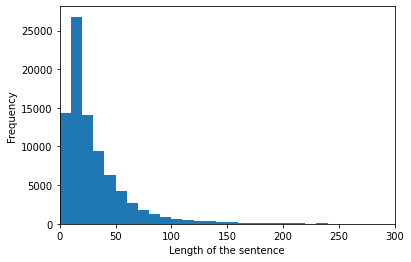

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# check the length distribution of the list with x ticks divided by 10 characters
plt.hist(list(map(len, list_sentences)), bins=np.arange(0, max(list(map(len, list_sentences)))+1, 10))
plt.xlim(0, 300) # set x tick limit to 300
plt.xlabel("Length of the sentence")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# check the distribution of the starting character of the list_poetic_sentences
# "가", "나","다" 등 시작하는 글자들에 따른 분포 확인할 필요 있음